# Subway Data

In [20]:
import numpy as np
import pandas as pd
subway_df = pd.read_csv('c:\users\BiffBaileyAdmin.BBIGBLDRSHP270F\Downloads\\nyc_subway_weather.csv')

In [3]:
subway_df.head()

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.0,30.258,55.98,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.0,30.258,55.98,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.0,30.258,55.98,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.0,30.258,55.98,7.86,40.700348,-73.887177


<h6> DataFrame Vectorized Operations Quiz </h6>

In [4]:
import pandas as pd
# Cumulative entries and exits for one station for a few hours.
entries_and_exits = pd.DataFrame({
    'ENTRIESn': [3144312, 3144335, 3144353, 3144424, 3144594,
                 3144808, 3144895, 3144905, 3144941, 3145094],
    'EXITSn': [1088151, 1088159, 1088177, 1088231, 1088275,
               1088317, 1088328, 1088331, 1088420, 1088753]
})
entries_and_exits.head()

,ENTRIESn,EXITSn
0,3144312,1088151
1,3144335,1088159
2,3144353,1088177
3,3144424,1088231
4,3144594,1088275


In [4]:
def get_hourly_entries_and_exits(entries_and_exits):
    '''
    Fill in this function to take a DataFrame with cumulative entries
    and exits (entries in the first column, exits in the second) and
    return a DataFrame with hourly entries and exits (entries in the
    first column, exits in the second).
    '''
    print entries_and_exits
    
    return None
    
get_hourly_entries_and_exits(entries_and_exits)

   ENTRIESn   EXITSn
0   3144312  1088151
1   3144335  1088159
2   3144353  1088177
3   3144424  1088231
4   3144594  1088275
5   3144808  1088317
6   3144895  1088328
7   3144905  1088331
8   3144941  1088420
9   3145094  1088753


In [5]:
print type(entries_and_exits.index.max())
print entries_and_exits.columns

<type 'numpy.int64'>
Index([u'ENTRIESn', u'EXITSn'], dtype='object')


In [7]:
def ComputeHourly(data_frame):
    Hourly_Difference = {}
    for column in data_frame.columns:
        Hourly_Difference["Hourly_" + column]=[]
        for index in data_frame.index:
            if index <= data_frame.index.max():
                if index == 0:
                    Hourly_Difference["Hourly_" + column].append(None)
                else:
                    Hourly_Difference["Hourly_" + column].append(data_frame.loc[index,column] - data_frame.loc[index-1,column])
    return Hourly_Difference
    print Hourly_Difference
ComputeHourly(entries_and_exits)
hourly_entries_and_exits = pd.DataFrame(Hourly_Difference)
hourly_entries_and_exits


,Hourly_ENTRIESn,Hourly_EXITSn
0,NaN,NaN
1,23.0,8.0
2,18.0,18.0
3,71.0,54.0
4,170.0,44.0
5,214.0,42.0
6,87.0,11.0
7,10.0,3.0
8,36.0,89.0
9,153.0,333.0


In [8]:
print Hourly_Difference

{'Hourly_EXITSn': [None, 8, 18, 54, 44, 42, 11, 3, 89, 333], 'Hourly_ENTRIESn': [None, 23, 18, 71, 170, 214, 87, 10, 36, 153]}


In [2]:
import numpy as np
import pandas as pd
grades_df = pd.DataFrame(
    data={'exam1': [43, 81, 78, 75, 89, 70, 91, 65, 98, 87],
          'exam2': [24, 63, 56, 56, 67, 51, 79, 46, 72, 60]},
    index=['Andre', 'Barry', 'Chris', 'Dan', 'Emilio', 
           'Fred', 'Greta', 'Humbert', 'Ivan', 'James'])
average = pd.Series(grades_df.mean(axis = 'columns'))
stddev = pd.Series(grades_df.std(axis = 'columns'))
dictionary = {}
print average.values
print stddev.values
for column in grades_df.columns:
    dictionary[column]=(grades_df[column]-average.values)/stddev.values
    print dictionary[column]
norm_rows_df = pd.DataFrame(
    data = dictionary,
    index= grades_df.index)
print norm_rows_df
    
  

[ 33.5  72.   67.   65.5  78.   60.5  85.   55.5  85.   73.5]
[ 13.43502884  12.72792206  15.55634919  13.43502884  15.55634919
  13.43502884   8.48528137  13.43502884  18.38477631  19.09188309]
Andre      0.707107
Barry      0.707107
Chris      0.707107
Dan        0.707107
Emilio     0.707107
Fred       0.707107
Greta      0.707107
Humbert    0.707107
Ivan       0.707107
James      0.707107
Name: exam1, dtype: float64
Andre     -0.707107
Barry     -0.707107
Chris     -0.707107
Dan       -0.707107
Emilio    -0.707107
Fred      -0.707107
Greta     -0.707107
Humbert   -0.707107
Ivan      -0.707107
James     -0.707107
Name: exam2, dtype: float64
            exam1     exam2
Andre    0.707107 -0.707107
Barry    0.707107 -0.707107
Chris    0.707107 -0.707107
Dan      0.707107 -0.707107
Emilio   0.707107 -0.707107
Fred     0.707107 -0.707107
Greta    0.707107 -0.707107
Humbert  0.707107 -0.707107
Ivan     0.707107 -0.707107
James    0.707107 -0.707107


In [23]:
subway_df.groupby("day_week")["ENTRIESn"].sum()

day_week
0    199103357736
1    200457948505
2    151265410608
3    152205023293
4    152492053831
5    151994224619
6    191978976179
Name: ENTRIESn, dtype: int64

In [14]:
subway_df.columns

Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly',
       u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday',
       u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi',
       u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi',
       u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat',
       u'weather_lon'],
      dtype='object')

In [15]:
subway_df.groupby(['UNIT','DATEn','TIMEn'])
subway_df.head(25)

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0.0,0.0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.00,30.258000,55.980000,7.86,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0.0,0.0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.00,30.258000,55.980000,7.86,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0.0,0.0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.00,30.258000,55.980000,7.86,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0.0,0.0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.00,30.258000,55.980000,7.86,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0.0,0.0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.00,30.258000,55.980000,7.86,40.700348,-73.887177
5,R003,05-02-11,00:00:00,4388348,2911036,15.0,34.0,2011-05-02 00:00:00,0,0,...,30.31,0,50.0,6.9,0.00,30.238333,54.166667,8.25,40.700348,-73.887177
6,R003,05-02-11,04:00:00,5818689,3874767,19.0,40.0,2011-05-02 04:00:00,4,0,...,30.27,0,50.0,4.6,0.00,30.238333,54.166667,8.25,40.700348,-73.887177
7,R003,05-02-11,08:00:00,4388855,2911194,488.0,118.0,2011-05-02 08:00:00,8,0,...,30.30,0,53.1,10.4,0.00,30.238333,54.166667,8.25,40.700348,-73.887177
8,R003,05-02-11,12:00:00,4389345,2911326,490.0,132.0,2011-05-02 12:00:00,12,0,...,30.24,0,57.0,11.5,0.00,30.238333,54.166667,8.25,40.700348,-73.887177
9,R003,05-02-11,16:00:00,4389576,2911558,231.0,232.0,2011-05-02 16:00:00,16,0,...,30.16,0,59.0,11.5,0.00,30.238333,54.166667,8.25,40.700348,-73.887177


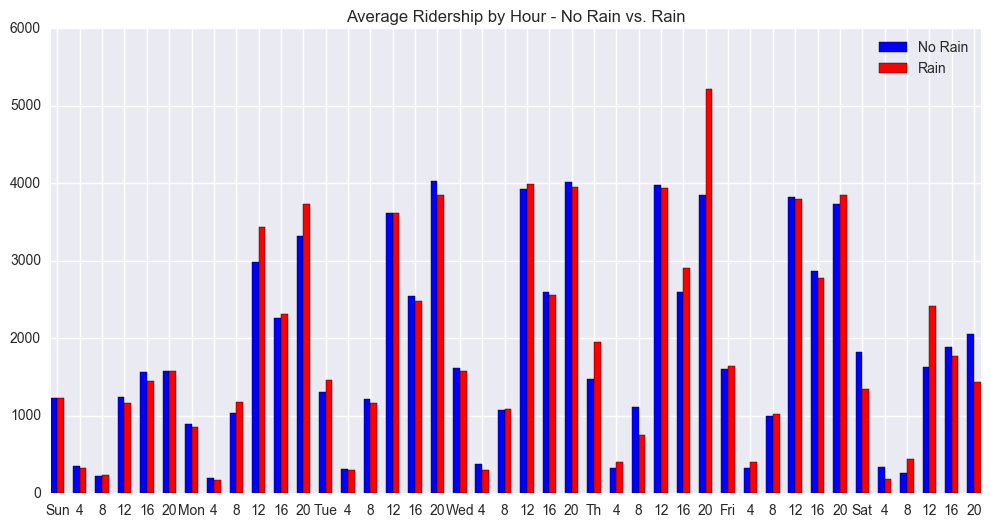

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
subway_no_rain_df = subway_df.loc[subway_df['rain'] == 0]
subway_no_rain_df.head()
subway_rain_df = subway_df.loc[subway_df['rain'] == 1]
y_no_rain = subway_no_rain_df.groupby(['day_week','hour'])['ENTRIESn_hourly'].mean()
y_rain = subway_rain_df.groupby(['day_week','hour'])['ENTRIESn_hourly'].mean()
x = subway_df.groupby(['day_week','hour'])['datetime'].min()
x2 = subway_df.groupby(['day_week','hour'])['datetime'].min()
x3 = []
for string in x2:
    conversion = datetime.datetime.strptime(string,'%Y-%m-%d %H:%M:%S')
    conversion2 = dates.date2num(conversion)
    x3.append(conversion2)
myplot = plt.figure(figsize=[12,6])
myplot.ax=plt.subplot(111)
xlabels =['Mon','4','8','12','16','20','Tue','4','8','12','16','20',
          'Wed','4','8','12','16','20','Th','4','8','12','16','20',
          'Fri','4','8','12','16','20','Sat','4','8','12','16','20',
          'Sun','4','8','12','16','20']
myplot.ax.bar(x3, y_no_rain, width=-0.05,align = "edge", color="b",
              tick_label=xlabels, label='No Rain')
myplot.ax.bar(x3, y_rain, width=0.05, align="edge", color='r',
              tick_label=xlabels, label="Rain")
plt.title("Average Ridership by Hour - No Rain vs. Rain")
plt.legend()
plt.show()

In [46]:
# --- Quiz ---
# DataFrame with cumulative entries and exits for multiple stations
ridership_df = pd.DataFrame({
    'UNIT': ['R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051', 'R079', 'R051'],
    'TIMEn': ['00:00:00', '02:00:00', '04:00:00', '06:00:00', '08:00:00', '10:00:00', '12:00:00', '14:00:00', '16:00:00'],
    'ENTRIESn': [3144312, 8936644, 3144335, 8936658, 3144353, 8936687, 3144424, 8936819, 3144594],
    'EXITSn': [1088151, 13755385,  1088159, 13755393,  1088177, 13755598, 1088231, 13756191,  1088275]
})

###print ridership_df

def return_self(self):
    return self

def subtract_custom_value(x, custom_value):
    return x-custom_value

def get_min(groupby_object, col):
    sorted_group = groupby_object.sort_values(col, inplace=False, ascending=False)
    return sorted_group.iloc[0]

def shift(groupby_object, s):
    return groupby_object.shift(s)
    

def hourly_entries_and_exits(groupby_object):
    return groupby_object - groupby_object.shift(1)

hourly_results = ridership_df.groupby("UNIT")[['ENTRIESn','EXITSn']].apply(hourly_entries_and_exits)
for column in hourly_results.columns:
    ridership_df[column+"_hourly"]=hourly_results[column].values
print ridership_df.sort_values("UNIT")



"""Fill in this function to take a DataFrame with cumulative entries
    and exits and return a DataFrame with hourly entries and exits.
    The hourly entries and exits should be calculated separately for
    each station (the 'UNIT' column).
    
    Hint: Use the `get_hourly_entries_and_exits()` function you wrote
    in a previous quiz, DataFrame Vectorized Operations, and the `.apply()`
    function, to help solve this problem."""
    

   ENTRIESn    EXITSn     TIMEn  UNIT  ENTRIESn_hourly  EXITSn_hourly
0   3144312   1088151  00:00:00  R051              NaN            NaN
2   3144335   1088159  04:00:00  R051             23.0            8.0
4   3144353   1088177  08:00:00  R051             18.0           18.0
6   3144424   1088231  12:00:00  R051             71.0           54.0
8   3144594   1088275  16:00:00  R051            170.0           44.0
1   8936644  13755385  02:00:00  R079              NaN            NaN
3   8936658  13755393  06:00:00  R079             14.0            8.0
5   8936687  13755598  10:00:00  R079             29.0          205.0
7   8936819  13756191  14:00:00  R079            132.0          593.0


"Fill in this function to take a DataFrame with cumulative entries\n    and exits and return a DataFrame with hourly entries and exits.\n    The hourly entries and exits should be calculated separately for\n    each station (the 'UNIT' column).\n    \n    Hint: Use the `get_hourly_entries_and_exits()` function you wrote\n    in a previous quiz, DataFrame Vectorized Operations, and the `.apply()`\n    function, to help solve this problem."

***
In the following quiz, create a plot of your choice showing something interesting about the New York subway data. For example, you might create:

* Histograms of subway ridership on both days with rain and days without rain
* A scatterplot of subway stations with latitude and longitude as the x and y axes and ridership as the bubble size
If you choose this option, you may wish to use the as_index=False argument to groupby(). There is example code in the following quiz.
* A scatterplot with subway ridership on one axis and precipitation or temperature on the other


In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

###values = np.array([1, 3, 2, 4, 1, 6, 4])
###example_df = pd.DataFrame({'value': values,'even': values % 2 == 0,
###    'above_three': values > 3 }, index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

###def revert_df(x):
###    return x

###even_df = example_df.groupby('even', as_index=False).apply(revert_df)
###even_df = example_df.sort_values('even')
###first_even = example_df.groupby('even').first()
###print even_df
###print first_even
###print first_even['even'] # Causes an error. 'even' is no longer a column in the DataFrame
    




  above_three   even  value
a       False  False      1
b       False  False      3
e       False  False      1
c       False   True      2
d        True   True      4
f        True   True      6
g        True   True      4
      above_three  value
even                    
False       False      1
True        False      2
